# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로부터 추론된 결정 규칙을 통해 값을 예측
* if-then-else 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을수록 복잡한 모델
* 결정 트리의 장점
  이해와 해석이 쉽다 <br>
  시각화가 용이하다 <br>
  많은 데이터 전처리가 필요하지 않다 <br>
  수치형과 범주형 데이터 모두를 다룰 수 있다 <br>

In [2]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pylab as plt
plt.style.use(['seaborn-whitegrid'])

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/3805478295.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [4]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# 데이터 Load

## 분류(Classification)을 위한 데이터

### 붓꽃 데이터 load

In [7]:
iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['taret'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),taret
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 와인 데이터 load

In [8]:
wine = load_wine()

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['taret'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,taret
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 유방암 데이터 load

In [9]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['taret'] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,taret
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 회귀(Regression)을 위한 데이터

### 보스턴 주택 가격 데이터 load

In [13]:
# 보스턴 주택 가격 데이터 가져오기
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

boston_df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','TARGET']

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = boston_df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new boston_df out of them
boston_df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 당뇨병 데이터 load

In [93]:
diabetes = load_diabetes()

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


# 분류 - DecisionTreeClassifier()

* `DecisionTreeClassifer`는 분류를 위한 결정트리 모델
* 두 개의 배열 X, y를 입력받음 <br>
  X는 [n_samples, n_features] 크기의 데이터 특성 배열 <br>
  y는 [n_samples] 키기의 정답 배열 <br>

In [16]:
X = [
    [0, 0],
    [1, 1]
]
y = [0, 1]

model = tree.DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [18]:
model.predict([
    [2.0, 2.0]
])

# [2.0, 2.0] 라는 data를 줬을 때, '1' class 선택

array([1])

In [19]:
model.predict_proba([
    [2.0, 2.0]
])

# [2.0, 2.0] 라는 data를 줬을 때, 확률적으로 [0.0, 1.0]에 가깝다

array([[0., 1.]])

## 붓꽃 데이터 학습

### 전처리 없이 학습, 교차검증

In [20]:
model = DecisionTreeClassifier()

In [21]:
cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

### 전처리 후 학습, 교차검증

* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [22]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [24]:
cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
)

# 전처리 전
# array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

# 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.


array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

### 학습된 결정 트리 시각화

In [25]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

#### 텍스트를 통한 시각화

In [28]:
r = tree.export_text(
    decision_tree=model,
    feature_names=iris.feature_names
)
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



#### plot_tree를 사용한 시각화

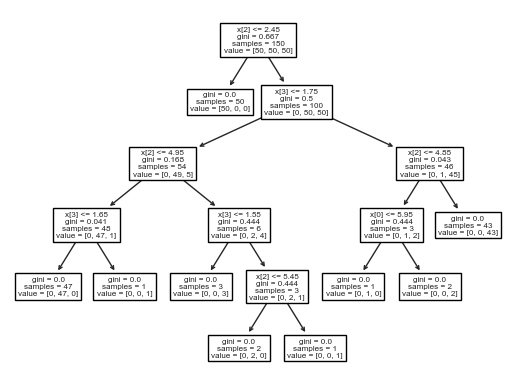

In [30]:
tree.plot_tree(model);

#### graphviz를 사용한 시각화

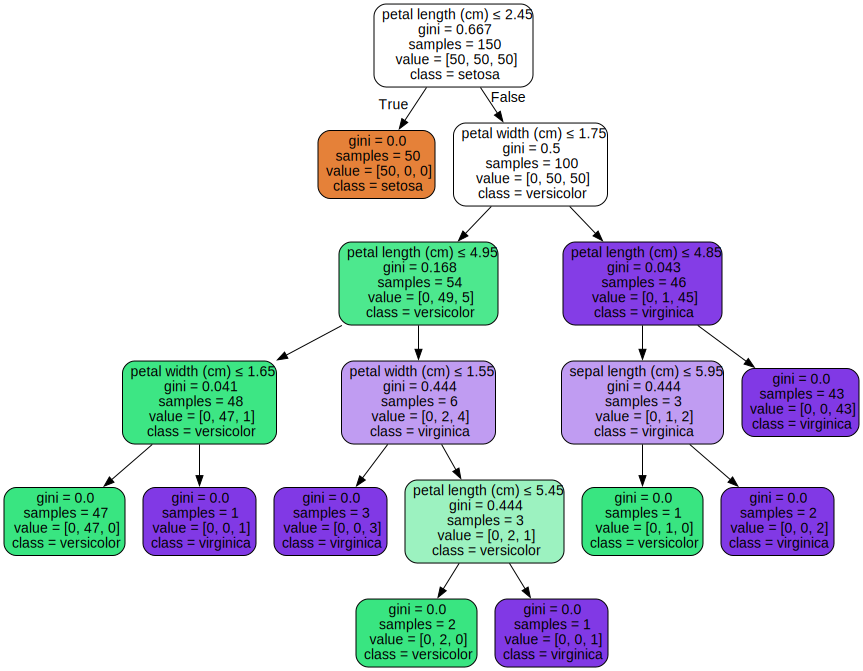

In [35]:
dot_data = tree.export_graphviz(
    decision_tree=model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True, # 색깔 채우고, 둥근 사각형
    special_characters=True    # 특수문자 허용
)

graph = graphviz.Source(dot_data)
graph

#### 결정 경계 시각화

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2523353348.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2523353348.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2523353348.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2523353348.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/9q/y4yb

(0.0, 7.88, -0.9, 3.4800000000000044)

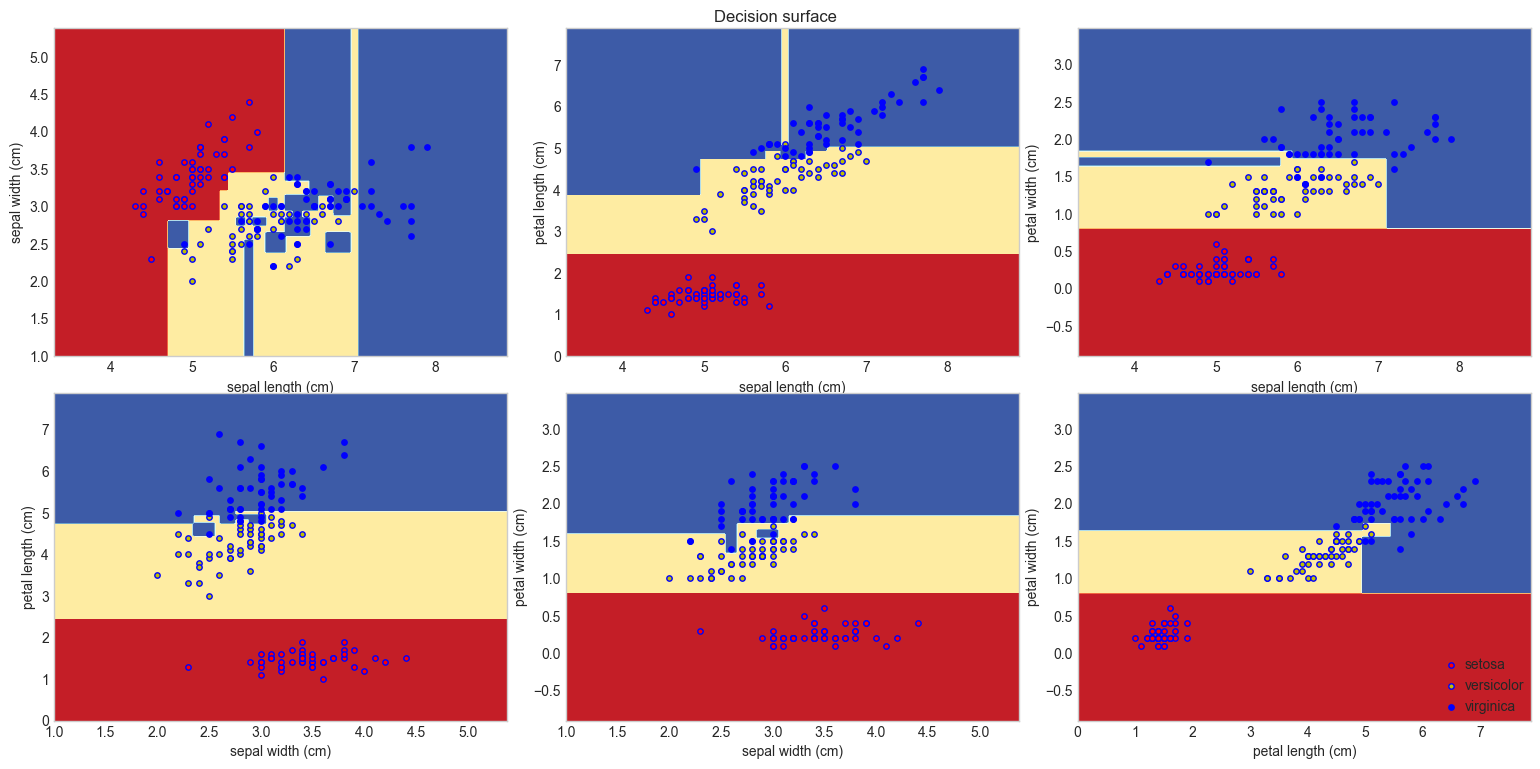

In [51]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  X = iris.data[:, pair]
  y = iris.target
  model = DecisionTreeClassifier()
  model = model.fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])
  
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

#### 하이퍼 파라미터를 변경해 보면서 결정 경계의 변화 확인

* model = DecisionTreeClassifier(max_depth=2) <br>
  --> max_depth를 2로 하여 depth에 제한을 준다.  <br>

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/3911643373.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/3911643373.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/3911643373.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/3911643373.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
/var/folders/9q/y4yb

(0.0, 7.88, -0.9, 3.4800000000000044)

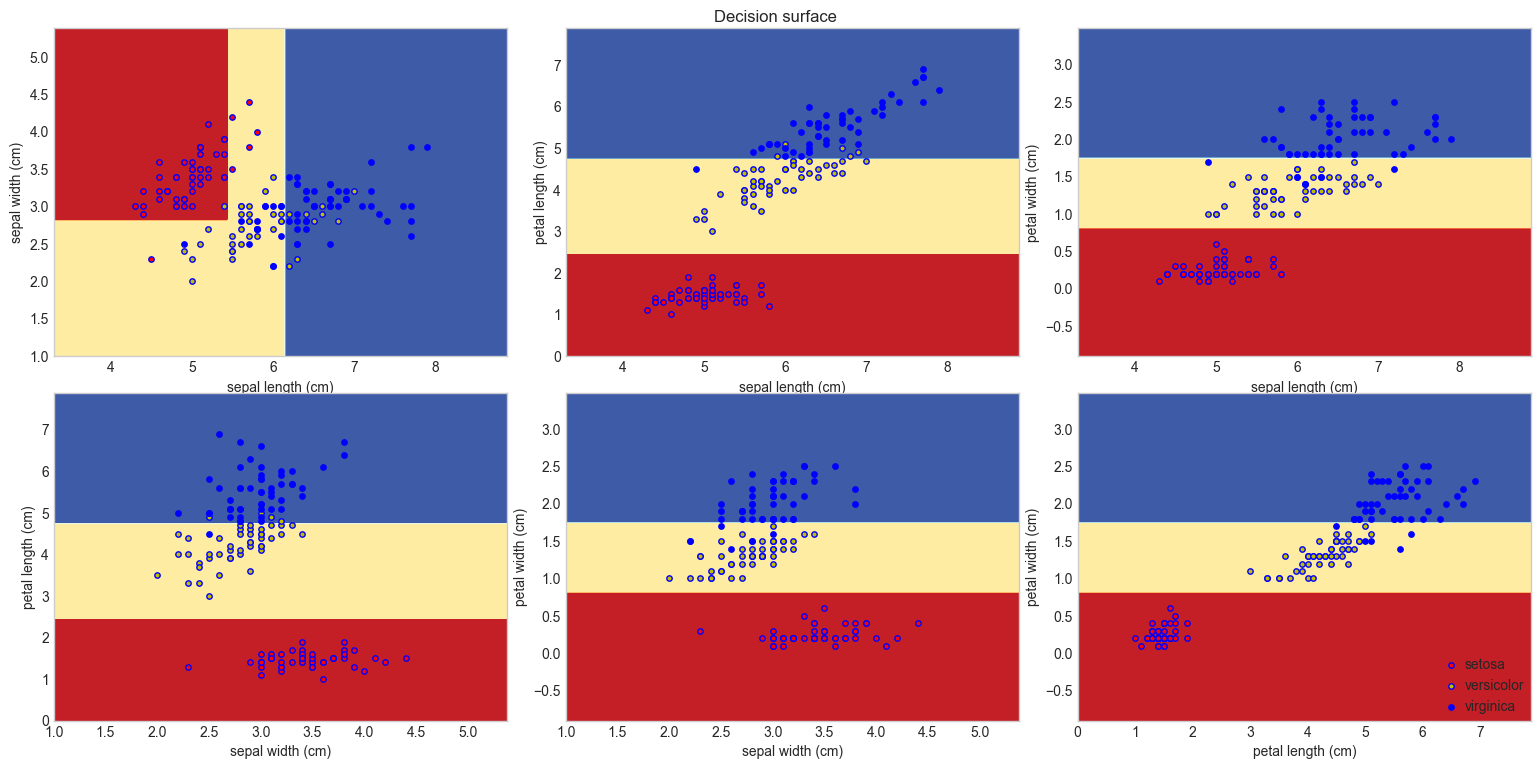

In [52]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  X = iris.data[:, pair]
  y = iris.target
  model = DecisionTreeClassifier(max_depth=2)
  model = model.fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])
  
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

## 와인 데이터 학습

### 전처리 없이 학습, 교차검증

In [53]:
model = DecisionTreeClassifier()

In [54]:
cross_val_score(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
)

array([0.91666667, 0.80555556, 0.88888889, 0.91428571, 0.82857143])

### 전처리 후 학습, 교차검증

* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [55]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [57]:
cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
)

# 전처리 전
# array([0.91666667, 0.80555556, 0.88888889, 0.91428571, 0.82857143])

# 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.


array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

### 학습된 결정 트리 시각화

In [58]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

#### 텍스트를 통한 시각화

In [59]:
r = tree.export_text(
    decision_tree=model,
    feature_names=wine.feature_names
)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- alcohol <= 13.51
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.51
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- malic_acid <= 2.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- malic_acid >  2.12
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- color_intensity <= 3.61
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.61
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.50
|

#### plot_tree를 사용한 시각화

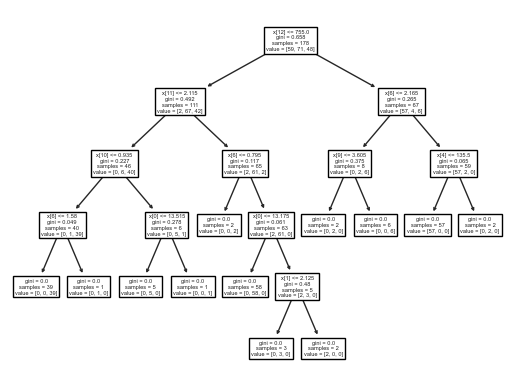

In [60]:
tree.plot_tree(model);

#### graphviz를 사용한 시각화

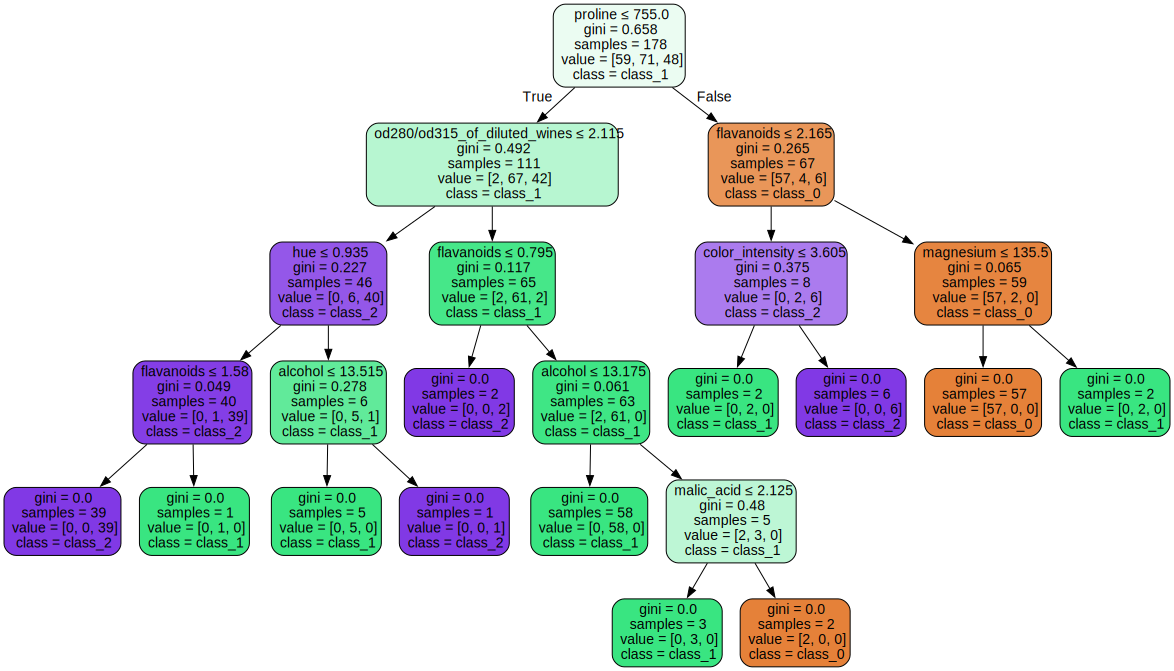

In [61]:
dot_data = tree.export_graphviz(
    decision_tree=model,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    filled=True, rounded=True, # 색깔 채우고, 둥근 사각형
    special_characters=True    # 특수문자 허용
)

graph = graphviz.Source(dot_data)
graph

#### 결정 경계 시각화

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2321574678.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2321574678.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2321574678.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2321574678.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
/var/folders/9q/y4yb

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

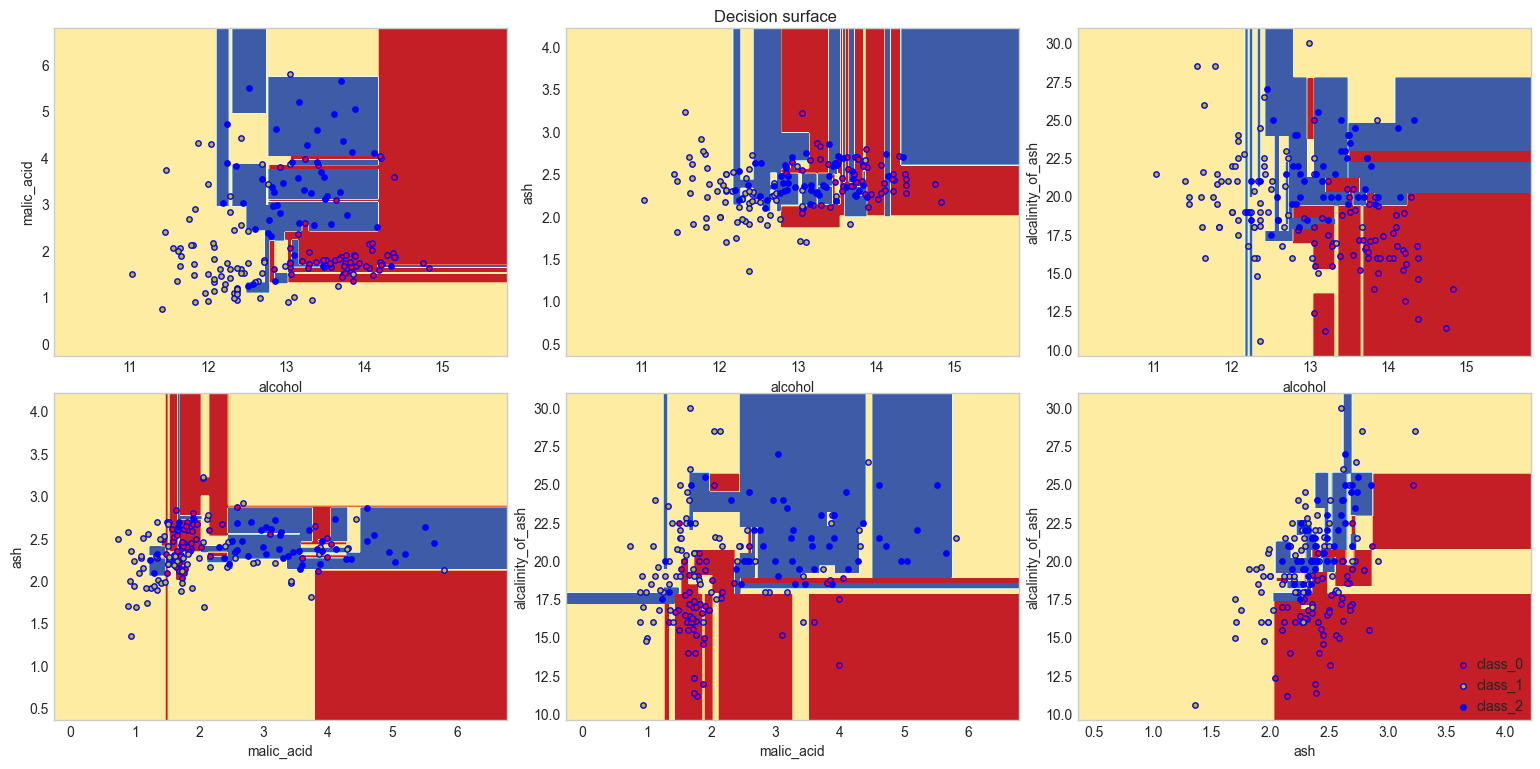

In [89]:
n_classes = 3 # wine data도 class가 3개이다.
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  X = wine.data[:, pair]
  y = wine.target
  model = DecisionTreeClassifier()
  model = model.fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])
  
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

#### 하이퍼 파라미터를 변경해 보면서 결정 경계의 변화 확인

* model = DecisionTreeClassifier(max_depth=2) <br>
  --> max_depth를 2로 하여 depth에 제한을 준다.  <br>

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2409967743.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2409967743.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2409967743.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2409967743.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
/var/folders/9q/y4yb

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

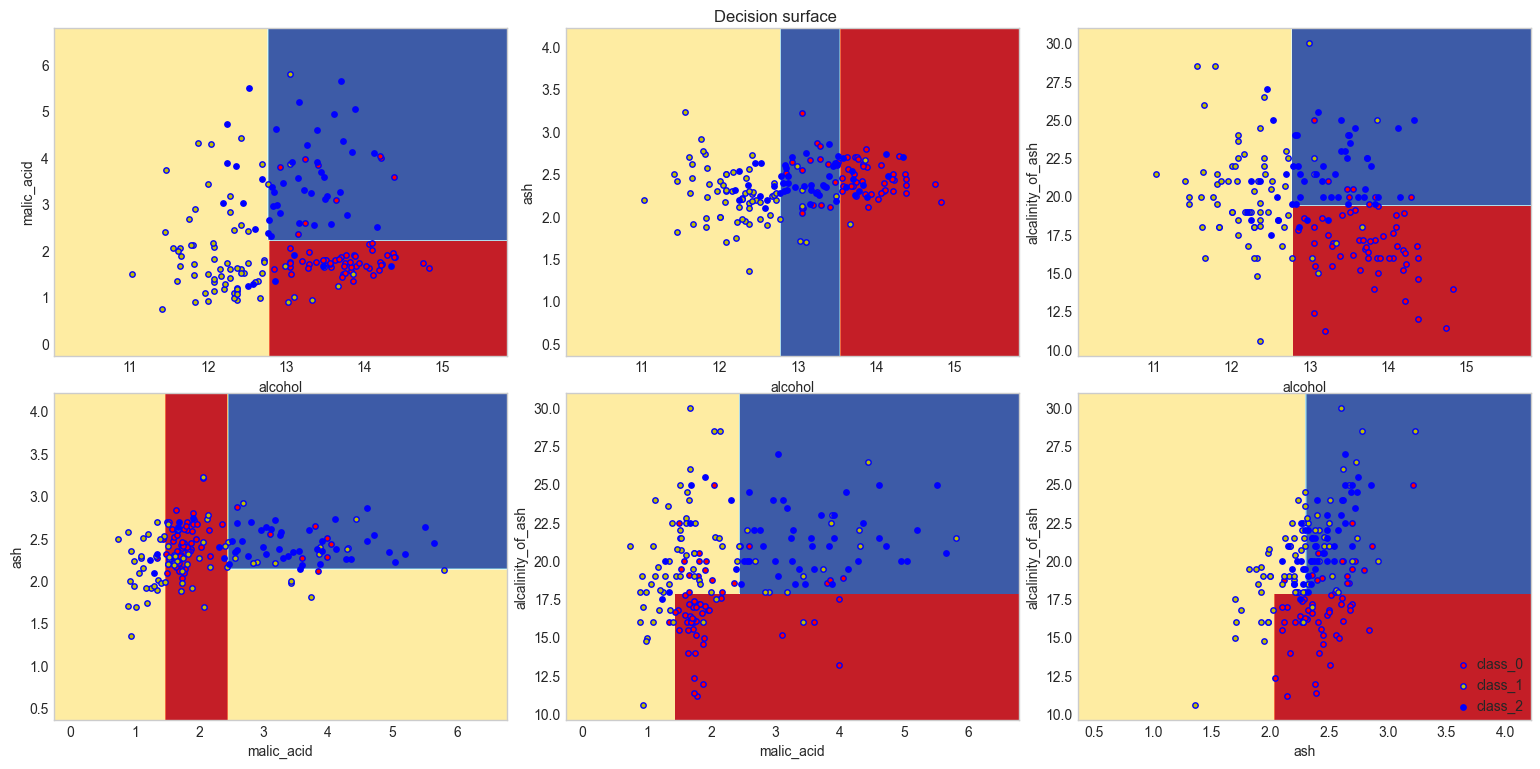

In [63]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  X = wine.data[:, pair]
  y = wine.target
  model = DecisionTreeClassifier(max_depth=2)
  model = model.fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])
  
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

## 유방암 데이터 학습

### 전처리 없이 학습, 교차검증

In [82]:
model = DecisionTreeClassifier()

In [83]:
cross_val_score(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
)

array([0.90350877, 0.92982456, 0.92105263, 0.95614035, 0.90265487])

### 전처리 후 학습, 교차검증

* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [84]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [85]:
cross_val_score(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
)

# 전처리 전
# array([0.9122807 , 0.92982456, 0.92982456, 0.95614035, 0.90265487])

# 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.


array([0.90350877, 0.90350877, 0.9122807 , 0.92982456, 0.89380531])

### 학습된 결정 트리 시각화

In [86]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

#### 텍스트를 통한 시각화

In [87]:
r = tree.export_text(
    decision_tree=model
)
print(r)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_28 <= 0.16
|   |   |   |--- class: 0
|   |   |--- feature_28 >  0.16
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_8 <= 0.18
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_8 >  0.18
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_15 <= 0.01
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_15 >  0.01
|   |   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_10

#### plot_tree를 사용한 시각화

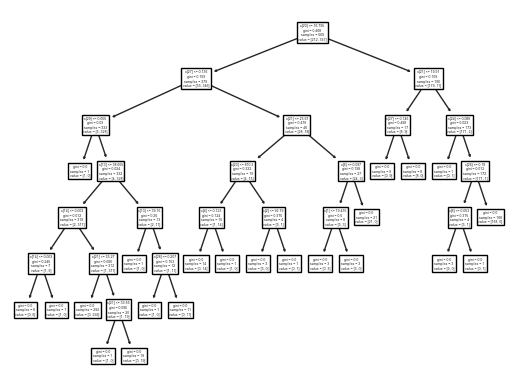

In [77]:
tree.plot_tree(model);

#### graphviz를 사용한 시각화

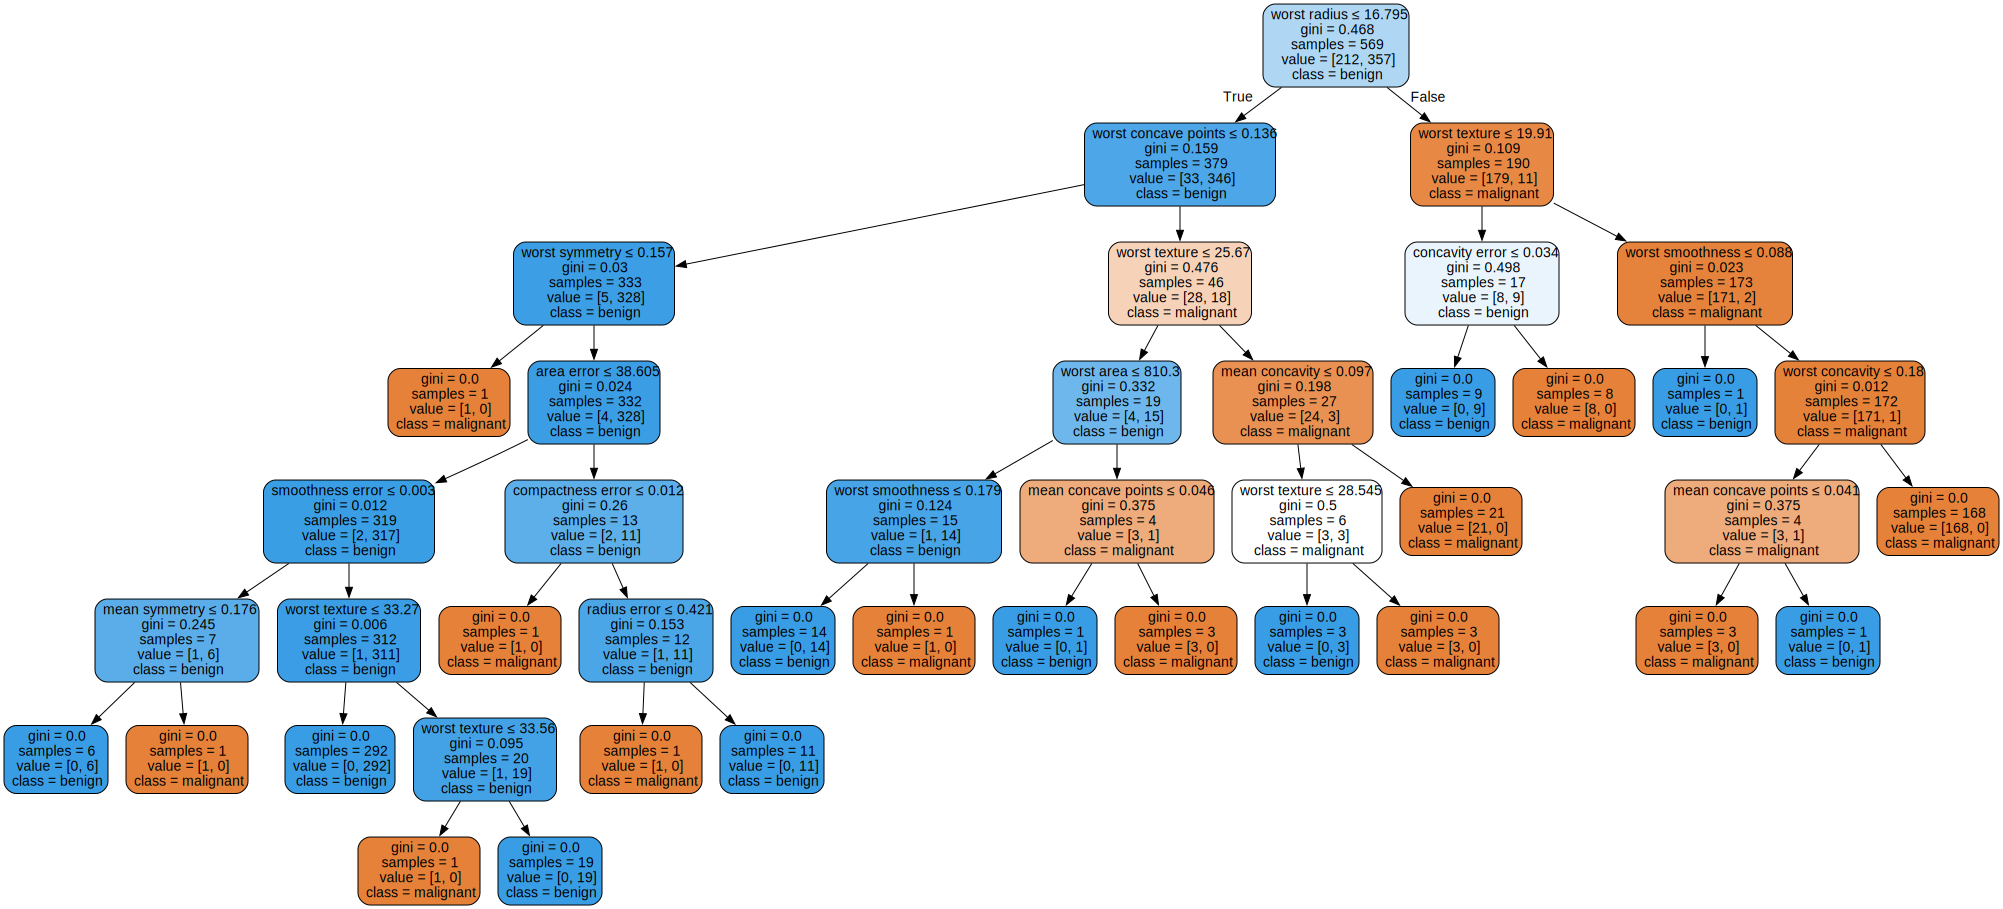

In [88]:
dot_data = tree.export_graphviz(
    decision_tree=model,
    feature_names=cancer.feature_names,
    class_names=cancer.target_names,
    filled=True, rounded=True, # 색깔 채우고, 둥근 사각형
    special_characters=True    # 특수문자 허용
)

graph = graphviz.Source(dot_data)
graph

#### 결정 경계 시각화

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/960663433.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/960663433.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/960663433.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],


(5.981, 29.10099999999951, 142.5, 2501.980000001207)

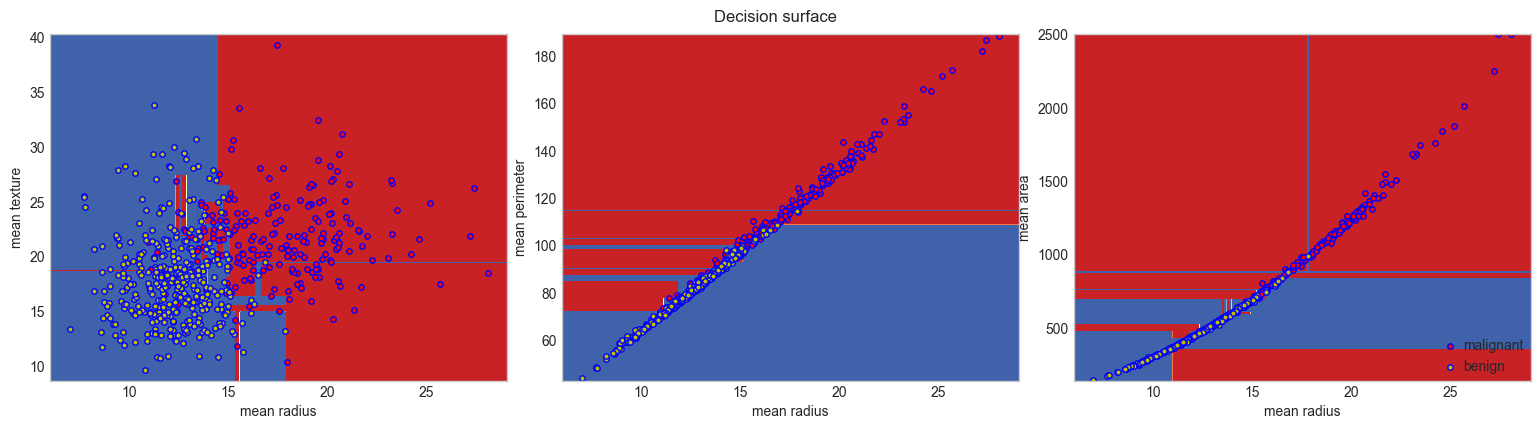

In [91]:
n_classes = 2 # 양성이냐, 음성이냐
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
  X = cancer.data[:, pair]
  y = cancer.target
  model = DecisionTreeClassifier()
  model = model.fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])
  
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

#### 하이퍼 파라미터를 변경해 보면서 결정 경계의 변화 확인

* model = DecisionTreeClassifier(max_depth=2) <br>
  --> max_depth를 2로 하여 depth에 제한을 준다.  <br>

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2669989639.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2669989639.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_6257/2669989639.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],


(5.981, 29.10099999999951, 142.5, 2501.980000001207)

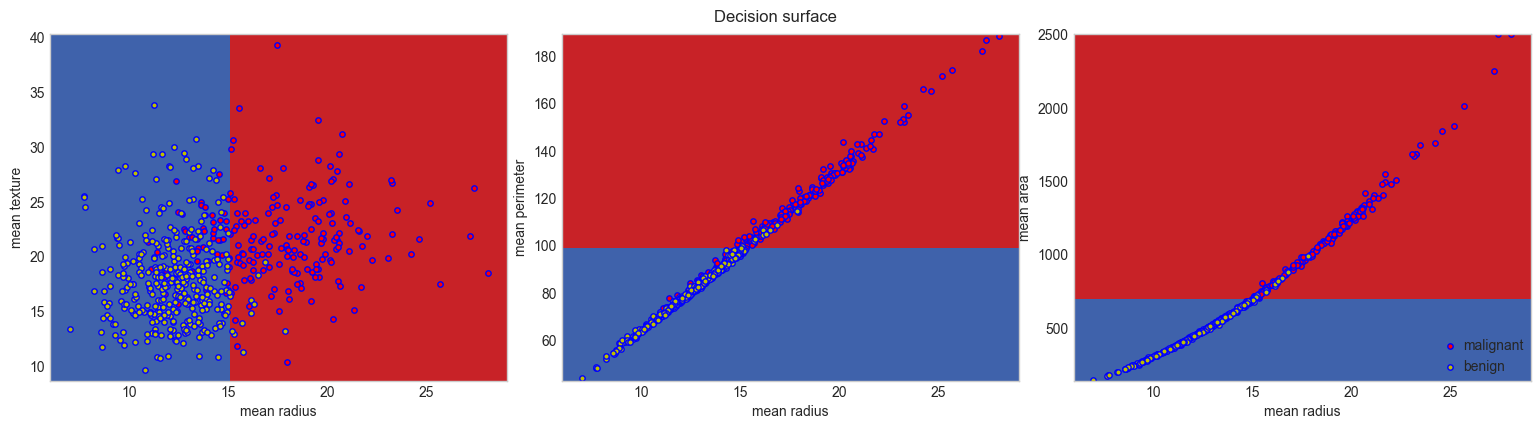

In [92]:
n_classes = 2
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
  X = cancer.data[:, pair]
  y = cancer.target
  model = DecisionTreeClassifier(max_depth=2)
  model = model.fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))

  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])
  
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

plt.suptitle("Decision surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

# 회귀 - DecisionTreeRegressor()

## 당뇨병 데이터 학습

### 전처리 없이 학습, 교차검증

In [118]:
model = DecisionTreeRegressor()

In [121]:
cross_val_score(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
)

array([-0.27774225, -0.0487226 , -0.08423077, -0.07169687, -0.13289341])

### 전처리 후 학습, 교차검증

* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [122]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

In [123]:
cross_val_score(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5, n_jobs=multiprocessing.cpu_count()
)

# 전처리 전
# array([-0.27774225, -0.0487226 , -0.08423077, -0.07169687, -0.13289341])

# 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.


array([-0.47713333, -0.01164152, -0.04637731, -0.13654817, -0.08272504])

### 학습된 결정 트리 시각화

In [126]:
model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

DecisionTreeRegressor()

#### 텍스트를 통한 시각화

In [127]:
print(tree.export_text(model, feature_names=diabetes.feature_names))

|--- s5 <= -0.00
|   |--- bmi <= 0.01
|   |   |--- s3 <= 0.02
|   |   |   |--- s2 <= 0.09
|   |   |   |   |--- sex <= 0.00
|   |   |   |   |   |--- bp <= -0.03
|   |   |   |   |   |   |--- age <= -0.05
|   |   |   |   |   |   |   |--- bp <= -0.09
|   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |--- bp >  -0.09
|   |   |   |   |   |   |   |   |--- bp <= -0.05
|   |   |   |   |   |   |   |   |   |--- bp <= -0.07
|   |   |   |   |   |   |   |   |   |   |--- value: [200.00]
|   |   |   |   |   |   |   |   |   |--- bp >  -0.07
|   |   |   |   |   |   |   |   |   |   |--- s5 <= -0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- s5 >  -0.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- bp >  -0.05
|   |   |   |   |   |   |   |   |   |--- s6 <= -0.05
|   |   |   |   |   |   |   |   |   |   |--- value: [134.00]
|   |   |

#### plot_tree를 사용한 시각화

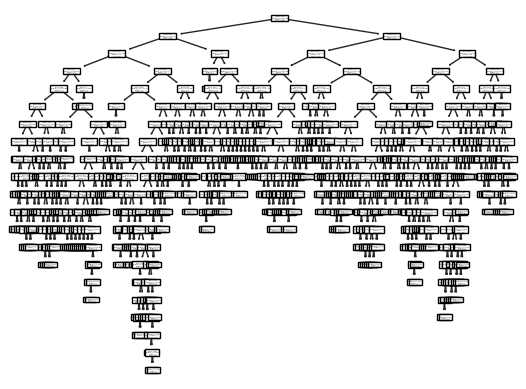

In [128]:
tree.plot_tree(model);

#### graphviz를 사용한 시각화

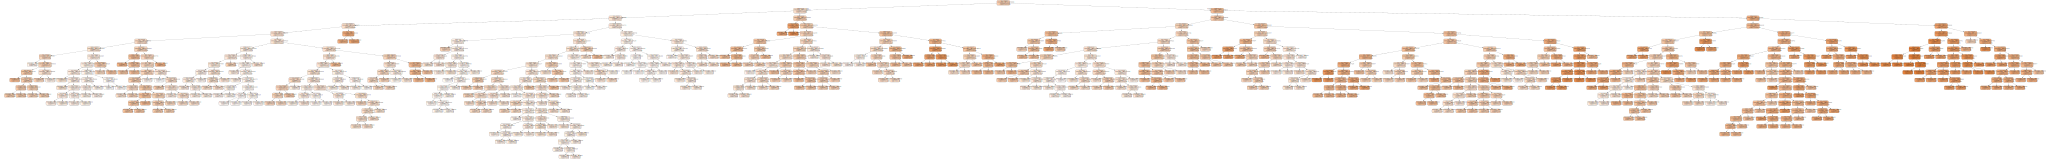

In [130]:
dot_data = tree.export_graphviz(
    decision_tree=model,
    feature_names=diabetes.feature_names,
    filled=True, rounded=True, # 색깔 채우고, 둥근 사각형
    special_characters=True    # 특수문자 허용
)

graph = graphviz.Source(dot_data)
graph

#### 회귀식 시각화

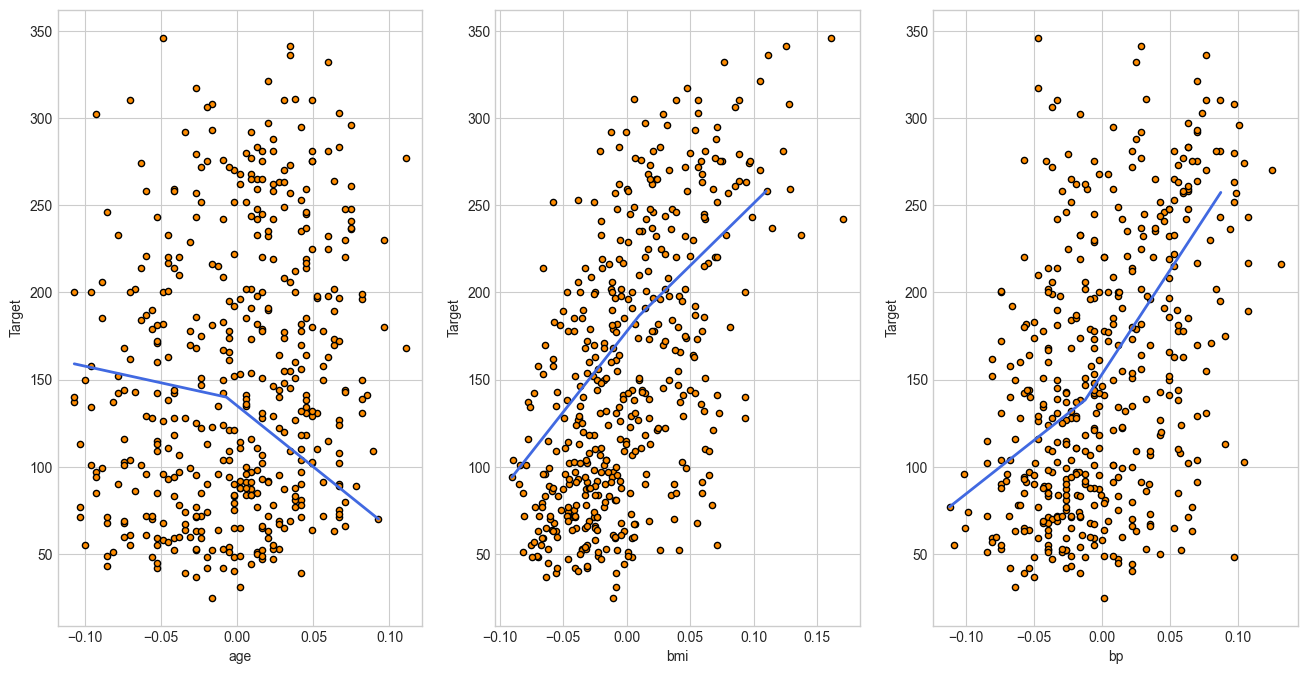

In [133]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([0, 2, 3]):
  X = diabetes.data[:, pair].reshape(-1, 1)
  y = diabetes.target

  model = DecisionTreeRegressor()
  model = model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx+1)
  plt.scatter(X, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(X_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target')

#### 하이퍼 파라미터를 변경해 보면서 회귀식 시각화

* model = DecisionTreeClassifier(max_depth=2) <br>
  --> max_depth를 2로 하여 depth에 제한을 준다.  <br>

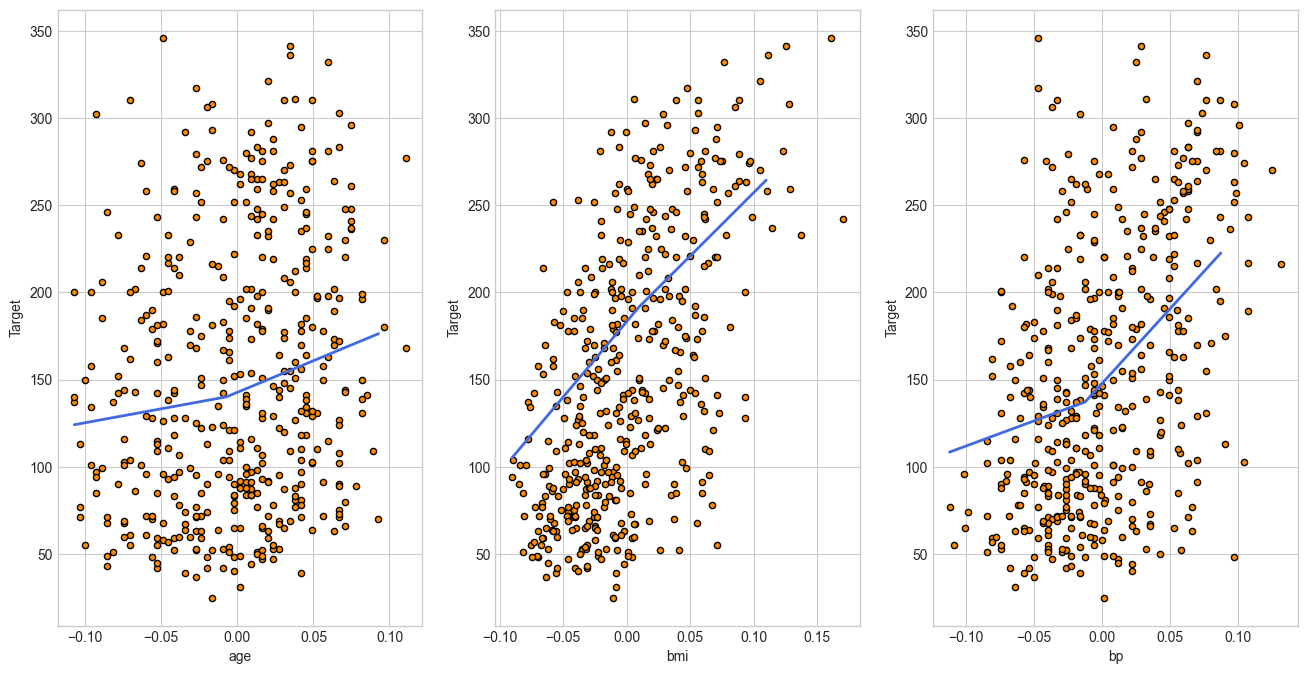

In [135]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([0, 2, 3]):
  X = diabetes.data[:, pair].reshape(-1, 1)
  y = diabetes.target

  model = DecisionTreeRegressor(max_depth=2)
  model = model.fit(X, y)

  X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
  predict = model.predict(X_test)

  plt.subplot(1, 3, pairidx+1)
  plt.scatter(X, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(X_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(diabetes.feature_names[pair])
  plt.ylabel('Target')